<a href="https://colab.research.google.com/github/vitorsanp/dsprojects/blob/SandboxProjects/SandBox_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Linguagem Natural: <b> Bag of Words, TF-IDF & Word Embedding</b></font></h1>
<hr>

# Read Tweets (Documents)

Vamos empregar nos exemplos à seguir a seguinte base de Tweets como documentos:

https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://meusite.mackenzie.br/rogerio/TweetsNeutralNews.csv')
df.iloc[0]

id                                          1038992008461930496
tweet_text    Esquerda e direita empatam na Suécia; ultranac...
tweet_date                       Mon Sep 10 03:26:13 +0000 2018
sentiment                                                Neutro
query_used                                                 veja
Name: 0, dtype: object

# Explore Tweets

In [ ]:
df.info()
len(df.tweet_text)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37556 entries, 0 to 37555
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          37556 non-null  int64 
 1   tweet_text  37556 non-null  object
 2   tweet_date  37556 non-null  object
 3   sentiment   37556 non-null  object
 4   query_used  37556 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


37556

In [ ]:
df.query_used.value_counts()

folha           7847
estadao         6744
exame           6444
g1              6198
jornaloglobo    5273
veja            5050
Name: query_used, dtype: int64

In [ ]:
df.shape

(37556, 5)

## Sample Tweets?

In [ ]:
df = df.sample(1000)

# Imports 

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
print ("nltk, gesim initialization ok")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
nltk, gesim initialization ok


# Tokenize words

Poderíamos também tokenizar sentenças e tratar cada uma como um documento. Mas não é o que faremos aqui.

In [ ]:
doc_words = [] # tokenize

for doc in df.tweet_text:
  tokens = word_tokenize(doc.lower())
  doc_words.append(tokens)

print(doc_words[0:5])  

[['#', 'eleições2018', ':', 'como', 'consultar', 'o', 'número', 'do', 'título', 'de', 'eleitor', 'https', ':', '//t.co/f1aphgmgc8', '#', 'g1', 'https', ':', '//t.co/7qx4cd7fgv'], ['&', 'gt', ';', '@', 'estadaointer', 'coreias', 'do', 'sul', 'e', 'do', 'norte', 'começam', 'a', 'remover', 'minas', 'terrestres', 'de', 'fronteira', 'https', ':', '//t.co/s21cdegq93'], ['senado', 'em', 'sp', ':', 'major', 'olímpio', 'tem', '24', '%', ',', 'mara', 'gabrili', ',', '17', '%', 'e', 'suplicy', ',', '15', '%', ',', 'segundo', 'boca', 'de', 'urna', 'https', ':', '//t.co/ofxzyi8itv'], ['é', 'possível', 'falar', 'de', 'eleições', 'sem', 'se', 'queimar', 'no', 'trabalho', '?', 'veja', 'dicas', 'https', ':', '//t.co/zf3kxgedd8', '#', 'eleições2018', '#', 'g1', 'https', ':', '//t.co/i1gltazrar'], ['integrantes', 'do', 'mst', 'reforçam', 'segurança', 'de', 'haddad', 'em', 'atos', 'de', 'campanha', '.', 'https', ':', '//t.co/rnrasvlmum', 'https', ':', '//t.co/bambxs69vj']]


# Criando nosso Dicionário

In [ ]:
dictionary = gensim.corpora.Dictionary(doc_words)
print(dictionary.token2id)

{'#': 0, '//t.co/7qx4cd7fgv': 1, '//t.co/f1aphgmgc8': 2, ':': 3, 'como': 4, 'consultar': 5, 'de': 6, 'do': 7, 'eleitor': 8, 'eleições2018': 9, 'g1': 10, 'https': 11, 'número': 12, 'o': 13, 'título': 14, '&': 15, '//t.co/s21cdegq93': 16, ';': 17, '@': 18, 'a': 19, 'começam': 20, 'coreias': 21, 'e': 22, 'estadaointer': 23, 'fronteira': 24, 'gt': 25, 'minas': 26, 'norte': 27, 'remover': 28, 'sul': 29, 'terrestres': 30, '%': 31, ',': 32, '//t.co/ofxzyi8itv': 33, '15': 34, '17': 35, '24': 36, 'boca': 37, 'em': 38, 'gabrili': 39, 'major': 40, 'mara': 41, 'olímpio': 42, 'segundo': 43, 'senado': 44, 'sp': 45, 'suplicy': 46, 'tem': 47, 'urna': 48, '//t.co/i1gltazrar': 49, '//t.co/zf3kxgedd8': 50, '?': 51, 'dicas': 52, 'eleições': 53, 'falar': 54, 'no': 55, 'possível': 56, 'queimar': 57, 'se': 58, 'sem': 59, 'trabalho': 60, 'veja': 61, 'é': 62, '.': 63, '//t.co/bambxs69vj': 64, '//t.co/rnrasvlmum': 65, 'atos': 66, 'campanha': 67, 'haddad': 68, 'integrantes': 69, 'mst': 70, 'reforçam': 71, 'segur

# BOW de um documento

Veja aqui a representação condensada do modelo BOW. Os tweets quasem não repetem palavras.

In [ ]:
print(dictionary.doc2bow(doc_words[0]))
print(dictionary.doc2bow(doc_words[10]))
print(dictionary.doc2bow(doc_words[100]))

doc0_bow = dictionary.doc2bow(doc_words[0]) 


[(0, 2), (1, 1), (2, 1), (3, 3), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1)]
[(3, 2), (7, 1), (11, 1), (88, 1), (130, 1), (136, 1), (137, 1), (138, 1), (139, 1), (140, 1), (141, 1), (142, 1)]
[(3, 2), (6, 2), (11, 1), (160, 1), (647, 1), (929, 1), (930, 1), (931, 1), (932, 1), (933, 1), (934, 1)]


# Algumas Explorações

Vamos fazer algumas explorações de dados dos textos. Um 'EDA' orientado a texto.

## Word length

Em alguns casos isso pode ser uma feature a ser adicionada em modelos.

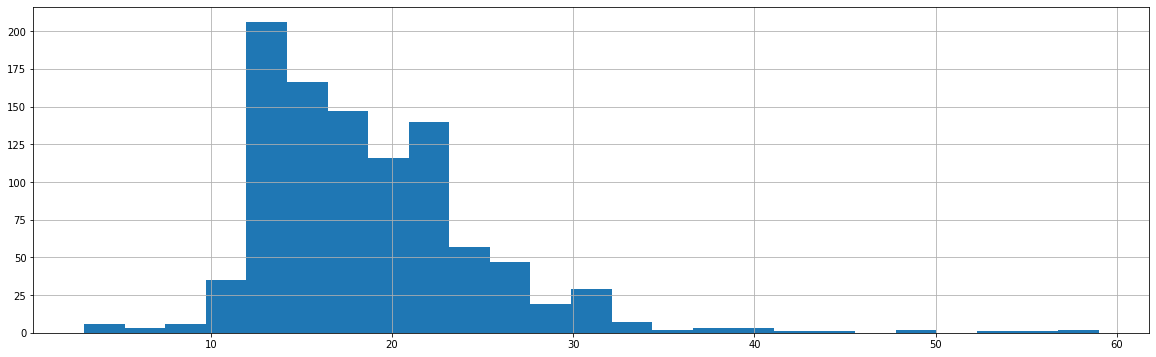

In [ ]:
import matplotlib.pyplot as plt

words_length = df.tweet_text.apply(lambda x: len(nltk.word_tokenize(x.lower())))
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6
words_length.hist(bins = 25)
plt.show()

## WordCloud

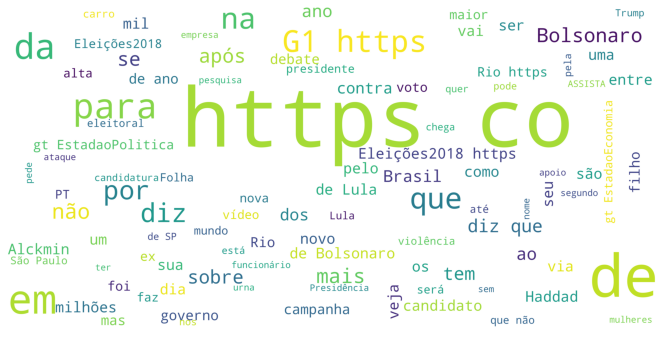

In [ ]:
from wordcloud import WordCloud

word_cloud_text = ''.join(df.tweet_text)
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Words mais e menos frequentes

In [ ]:
from collections import Counter

all_tweets_text = ''.join(df.tweet_text)
tokenized_words = nltk.word_tokenize(all_tweets_text)
word_freq = Counter(tokenized_words)

len(word_freq)

5724

In [ ]:
word_freq.most_common(np.int(len(word_freq)/100)) # 1% mais frequente

[(':', 1602),
 ('https', 1417),
 ('de', 710),
 (',', 425),
 ('#', 326),
 ('e', 258),
 ('em', 248),
 ('do', 225),
 ('a', 208),
 ('no', 172),
 ('para', 170),
 ('que', 162),
 ('G1', 159),
 (';', 155),
 ('da', 145),
 ('@', 141),
 ('.', 137),
 ('diz', 125),
 ('na', 115),
 ("'", 111),
 ('com', 111),
 ('o', 102),
 ('&', 98),
 ('gt', 97),
 ('por', 89),
 ('é', 89),
 ('Bolsonaro', 78),
 ('não', 64),
 ('%', 53),
 ('mais', 51),
 ('Eleições2018', 48),
 ('anos', 46),
 ('se', 44),
 ('$', 44),
 ('após', 43),
 ('ao', 43),
 ('sobre', 42),
 ('à', 40),
 ('R', 37),
 ('tem', 36),
 ('dos', 35),
 ('contra', 34),
 ('’', 32),
 ('Brasil', 32),
 ('?', 31),
 ('Rio', 31),
 ('Lula', 31),
 ('‘', 29),
 ('ser', 27),
 ('das', 27),
 ('vai', 26),
 (')', 25),
 ('são', 25),
 ('Haddad', 24),
 ('turno', 24),
 ('(', 24),
 ('-via', 23)]

In [ ]:
word_freq.most_common()[-np.int(len(word_freq)/100):-1] # 1% menos frequente

[('recontratar', 1),
 ('Gunn', 1),
 ('//t.co/nfkDAEQGvnFlávio', 1),
 ('Cesar', 1),
 ('Maia', 1),
 ('Lindbergh', 1),
 ('Chico', 1),
 ('Alencar', 1),
 ('empatados', 1),
 ('//t.co/wdoXycp5br', 1),
 ('//t.co/iddCrCYrVvPepsico', 1),
 ('Danone', 1),
 ('unem', 1),
 ('fabricar', 1),
 ('garrafas', 1),
 ('ecológicas', 1),
 ("//t.co/P7AyuFUtoc'Desafio", 1),
 ('Saudável', 1),
 ('iniciam', 1),
 ('melhorar', 1),
 ('hábitos', 1),
 ('//t.co/tnf2TaUh5G', 1),
 ('//t.co/bc2pzLqhsnKátia', 1),
 ('Abreu', 1),
 ('votará', 1),
 ('//t.co/4X8To1fDyb', 1),
 ('//t.co/M1vokPEe7KSTF', 1),
 ('prorroga', 1),
 ('inquérito', 1),
 ('propina', 1),
 ('//t.co/TQ2HrvsbICEleição', 1),
 ('Acre', 1),
 ('marcada', 1),
 ('históricos', 1),
 ("//t.co/OJCOGLugin'Não", 1),
 ('posso', 1),
 ('mão', 1),
 ('fascismo', 1),
 ('//t.co/Z1fsRRWm5a', 1),
 ('G1Homem', 1),
 ('desfigurado', 1),
 ('velha', 1),
 ('receber', 1),
 ('//t.co/X0rHPGzU4l', 1),
 ('//t.co/zy28EVzwVYPolíticos', 1),
 ('IR', 1),
 ('nem', 1),
 ('contribuem', 1),
 ('//t.co/rjf

# Explore Bi-grams

In [ ]:
from nltk.util import ngrams

def top_k_ngrams(word_tokens,n,k):
    
    ## Getting them as n-grams
    n_gram_list = list(ngrams(word_tokens, n))

    ### Getting each n-gram as a separate string
    n_gram_strings = [' '.join(each) for each in n_gram_list]
    
    n_gram_counter = Counter(n_gram_strings)
    most_common_k = n_gram_counter.most_common(k)
    print(most_common_k)
    
   # x_pos = [k for k,v in most_common_k]
   # y_pos = [v for k,v in most_common_k]
    
   # plt.bar(x_pos, y_pos,align='center')

In [ ]:
all_tweets_text = ''.join(df.tweet_text)
tokenized_words = nltk.word_tokenize(all_tweets_text)

## Calling the function for top k
top_k_ngrams(tokenized_words, 2, 10)

[('https :', 1417), ('# G1', 158), ('G1 https', 122), ('. https', 101), ('& gt', 97), ('gt ;', 97), ('; @', 97), (', diz', 77), ('# Eleições2018', 48), ('R $', 37)]


## Lei de Zipf

Veja quantas colunas foram criadas!!! 

In [ ]:
# Alerta
# Este código cria uma word-document matrix e vai falhar por falta de memória para todos os documentos!!!
#
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(df.tweet_text)
d = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
d.head()

,00,000,001qv5kivj,00gjpfeka3,02,05,077,08,0a2yickrxm,0aqkqxbugg,0catfjyji3,0chlqaklkf,0euyp7rolq,0gqyknfjtj,0hgg9dpnpk,0hjtdjdkoj,0hjuqbzmr2,0m0txqjkmk,0mdvxwqpfb,0otcndemls,0qmfa3p7pz,0rwxcbc1qd,0t8pvrkpie,0tl2pprubf,0tonhnlggh,0u2ciey5px,0vxpsuhr3d,0w3qygz13z,0y6hssq247,10,100,102,10dpu9m7gu,10ª,11,12,12rw05v7s3,13,133,13º,...,zobkliu5hg,zomba,zombie,zona,zp2qlplh8g,zrhjhlbgi3,zrzmxj6y6g,ztjgincs5e,zugtluve9n,zun8cftvsv,zvq7794hyw,zwfbgqcphe,zwsq4openq,zx4clgnfcz,zy28evzwvy,zygwabqsiq,zz47mfbas0,às,áfrica,água,águas,álbum,álcool,árabes,árbitro,árbitros,árvores,áustria,ética,ícaro,ídolos,índia,índice,ótima,última,últimas,último,últimos,única,único
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


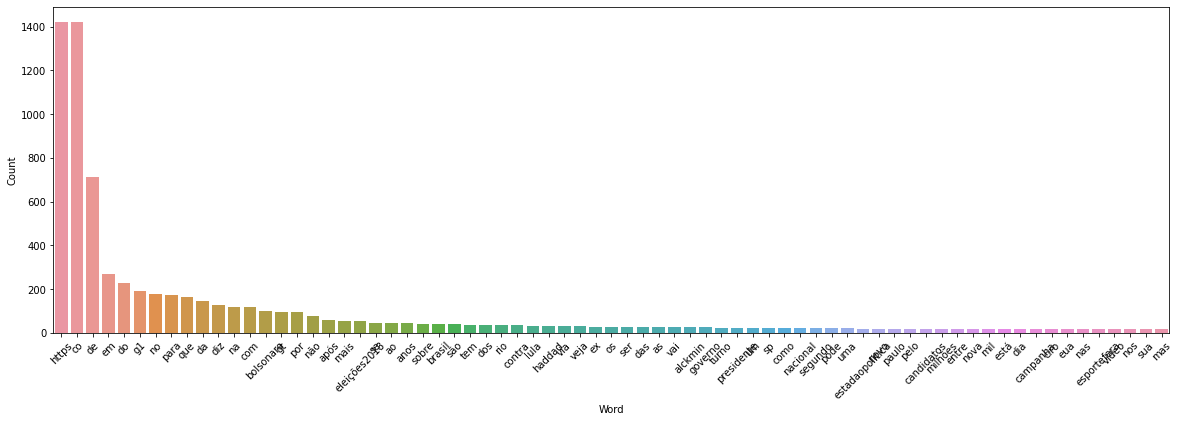

In [ ]:
w = pd.DataFrame( d.sum() )
w = w.reset_index()
w.columns = ['Word','Count']
w.head()

w = w.sort_values('Count',ascending=False)

w = w[w.Count > 15]
import seaborn as sns

sns.barplot(w.Word,w.Count)
plt.xticks(rotation=45)
plt.show()

# Stopwords

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words("portuguese"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'e

## Tweet COM e SEM stop words

In [ ]:
stop_words = set(stopwords.words("portuguese"))
without_stop_words = []
stopword = []
sentence = df.iloc[0].tweet_text
words = nltk.word_tokenize(sentence)
for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)

print(df.iloc[0].tweet_text)
print()
print(stopword)
print()
print(without_stop_words)

#Eleições2018: como consultar o número do título de eleitor https://t.co/f1aPHGmGc8 #G1 https://t.co/7Qx4cD7fGv

['como', 'o', 'do', 'de']

['#', 'Eleições2018', ':', 'consultar', 'número', 'título', 'eleitor', 'https', ':', '//t.co/f1aPHGmGc8', '#', 'G1', 'https', ':', '//t.co/7Qx4cD7fGv']


# Revisando nosso dicionário

Vamos limpar stopwords, pontuação e termos que julgamos não úteis.

In [ ]:
doc_words = [] # tokenize

for doc in df.tweet_text:
  tokens = word_tokenize(doc.lower())
  doc_words.append(tokens)

print(doc_words[0:5])  

[['#', 'eleições2018', ':', 'como', 'consultar', 'o', 'número', 'do', 'título', 'de', 'eleitor', 'https', ':', '//t.co/f1aphgmgc8', '#', 'g1', 'https', ':', '//t.co/7qx4cd7fgv'], ['&', 'gt', ';', '@', 'estadaointer', 'coreias', 'do', 'sul', 'e', 'do', 'norte', 'começam', 'a', 'remover', 'minas', 'terrestres', 'de', 'fronteira', 'https', ':', '//t.co/s21cdegq93'], ['senado', 'em', 'sp', ':', 'major', 'olímpio', 'tem', '24', '%', ',', 'mara', 'gabrili', ',', '17', '%', 'e', 'suplicy', ',', '15', '%', ',', 'segundo', 'boca', 'de', 'urna', 'https', ':', '//t.co/ofxzyi8itv'], ['é', 'possível', 'falar', 'de', 'eleições', 'sem', 'se', 'queimar', 'no', 'trabalho', '?', 'veja', 'dicas', 'https', ':', '//t.co/zf3kxgedd8', '#', 'eleições2018', '#', 'g1', 'https', ':', '//t.co/i1gltazrar'], ['integrantes', 'do', 'mst', 'reforçam', 'segurança', 'de', 'haddad', 'em', 'atos', 'de', 'campanha', '.', 'https', ':', '//t.co/rnrasvlmum', 'https', ':', '//t.co/bambxs69vj']]


## Stop words

In [ ]:
stop_words_port = stopwords.words("portuguese")

doc_words = [] # tokenize

for doc in df.tweet_text:
  tokens = word_tokenize(doc.lower())
  tokens_clean = [each for each in tokens if each not in stop_words_port]  
  doc_words.append(tokens_clean)


print(doc_words[0:5])  

[['#', 'eleições2018', ':', 'consultar', 'número', 'título', 'eleitor', 'https', ':', '//t.co/f1aphgmgc8', '#', 'g1', 'https', ':', '//t.co/7qx4cd7fgv'], ['&', 'gt', ';', '@', 'estadaointer', 'coreias', 'sul', 'norte', 'começam', 'remover', 'minas', 'terrestres', 'fronteira', 'https', ':', '//t.co/s21cdegq93'], ['senado', 'sp', ':', 'major', 'olímpio', '24', '%', ',', 'mara', 'gabrili', ',', '17', '%', 'suplicy', ',', '15', '%', ',', 'segundo', 'boca', 'urna', 'https', ':', '//t.co/ofxzyi8itv'], ['possível', 'falar', 'eleições', 'queimar', 'trabalho', '?', 'veja', 'dicas', 'https', ':', '//t.co/zf3kxgedd8', '#', 'eleições2018', '#', 'g1', 'https', ':', '//t.co/i1gltazrar'], ['integrantes', 'mst', 'reforçam', 'segurança', 'haddad', 'atos', 'campanha', '.', 'https', ':', '//t.co/rnrasvlmum', 'https', ':', '//t.co/bambxs69vj']]


## Pontuação

Também poderíamos usar uma **expressão regular** para eliminar a identificação dos Tweets. Mas não faremos isso aqui.

In [ ]:
import string
print(string.punctuation)
trash = [e for e in string.punctuation]

for e in ['http','https']:
  trash.append(e)
  
print(trash)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'http', 'https']


In [ ]:
stop_words_port = stopwords.words("portuguese")

doc_words = [] # tokenize

for doc in df.tweet_text:
  tokens = word_tokenize(doc.lower())
  tokens_clean = [each for each in tokens if each not in stop_words_port]  
  tokens_clean = [each for each in tokens_clean if each not in trash]  
  doc_words.append(tokens_clean)

print(doc_words[0:5])  

[['eleições2018', 'consultar', 'número', 'título', 'eleitor', '//t.co/f1aphgmgc8', 'g1', '//t.co/7qx4cd7fgv'], ['gt', 'estadaointer', 'coreias', 'sul', 'norte', 'começam', 'remover', 'minas', 'terrestres', 'fronteira', '//t.co/s21cdegq93'], ['senado', 'sp', 'major', 'olímpio', '24', 'mara', 'gabrili', '17', 'suplicy', '15', 'segundo', 'boca', 'urna', '//t.co/ofxzyi8itv'], ['possível', 'falar', 'eleições', 'queimar', 'trabalho', 'veja', 'dicas', '//t.co/zf3kxgedd8', 'eleições2018', 'g1', '//t.co/i1gltazrar'], ['integrantes', 'mst', 'reforçam', 'segurança', 'haddad', 'atos', 'campanha', '//t.co/rnrasvlmum', '//t.co/bambxs69vj']]


## Stemming

In [ ]:
nltk.download("rslp")

stemmer = nltk.stem.RSLPStemmer()
print(stemmer.stem('economista'))
print(stemmer.stem('economia'))
print(stemmer.stem('econômico'))




[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
econom
econom
econôm


In [ ]:
stop_words_port = stopwords.words("portuguese")

doc_words = [] # tokenize

for doc in df.tweet_text:
  tokens = word_tokenize(doc.lower())
  tokens_clean = [each for each in tokens if each not in stop_words_port]  
  tokens_clean = [each for each in tokens_clean if each not in trash]  
  tokens_clean = [stemmer.stem(each) for each in tokens_clean]
  doc_words.append(tokens_clean)

print(doc_words[0:5]) 

[['eleições2018', 'consult', 'númer', 'títul', 'elei', '//t.co/f1aphgmgc8', 'g1', '//t.co/7qx4cd7fgv'], ['gt', 'estadaoint', 'core', 'sul', 'nort', 'começ', 'remov', 'min', 'terrestr', 'fronteir', '//t.co/s21cdegq93'], ['sen', 'sp', 'maj', 'olímpi', '24', 'mar', 'gabril', '17', 'suplicy', '15', 'segund', 'boc', 'urn', '//t.co/ofxzyi8itv'], ['possível', 'fal', 'ele', 'queim', 'trabalh', 'vej', 'dic', '//t.co/zf3kxgedd8', 'eleições2018', 'g1', '//t.co/i1gltazr'], ['integr', 'mst', 'reforç', 'seguranç', 'haddad', 'ato', 'campanh', '//t.co/rnrasvlmum', '//t.co/bambxs69vj']]


# Criando nosso Novo Dicionário Clean

In [ ]:
dictionary = gensim.corpora.Dictionary(doc_words)
print(dictionary.token2id)

{'//t.co/7qx4cd7fgv': 0, '//t.co/f1aphgmgc8': 1, 'consult': 2, 'elei': 3, 'eleições2018': 4, 'g1': 5, 'númer': 6, 'títul': 7, '//t.co/s21cdegq93': 8, 'começ': 9, 'core': 10, 'estadaoint': 11, 'fronteir': 12, 'gt': 13, 'min': 14, 'nort': 15, 'remov': 16, 'sul': 17, 'terrestr': 18, '//t.co/ofxzyi8itv': 19, '15': 20, '17': 21, '24': 22, 'boc': 23, 'gabril': 24, 'maj': 25, 'mar': 26, 'olímpi': 27, 'segund': 28, 'sen': 29, 'sp': 30, 'suplicy': 31, 'urn': 32, '//t.co/i1gltazr': 33, '//t.co/zf3kxgedd8': 34, 'dic': 35, 'ele': 36, 'fal': 37, 'possível': 38, 'queim': 39, 'trabalh': 40, 'vej': 41, '//t.co/bambxs69vj': 42, '//t.co/rnrasvlmum': 43, 'ato': 44, 'campanh': 45, 'haddad': 46, 'integr': 47, 'mst': 48, 'reforç': 49, 'seguranç': 50, '//t.co/hmho8rqecc': 51, 'conden': 52, 'defend': 53, 'jornal': 54, 'líd': 55, 'mianm': 56, '//t.co/gddvkpao22': 57, 'advog': 58, 'candidat': 59, 'diz': 60, 'outr': 61, 'ped': 62, 'presidenci': 63, 'registr': 64, 'rit': 65, "'new": 66, '//t.co/0tonhnlggh': 67, '

# BOW de um documento

In [ ]:
print(dictionary.doc2bow(doc_words[0]))
print(dictionary.doc2bow(doc_words[10]))
print(dictionary.doc2bow(doc_words[100]))

doc0_bow = dictionary.doc2bow(doc_words[0]) 


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]
[(105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)]
[(40, 1), (240, 1), (796, 1), (797, 1), (798, 1), (799, 1), (800, 1)]


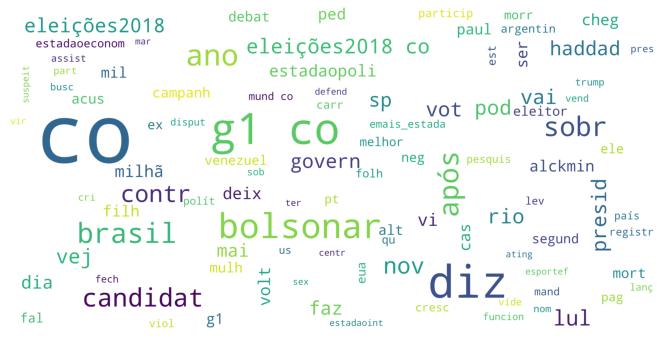

In [ ]:
from wordcloud import WordCloud

word_cloud_text = ''.join([' '.join(doc) for doc in doc_words])
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



# Criando nosso 'Corpus' de Documentos

O 'Corpus' é uma base contendo todos os documentos.

In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in doc_words]

In [ ]:
len(corpus) == len(doc_words)


True

# TF-IDF de um Documento

Uma representação que leva em conta a quantidade de têrmos na coleção (corpus).

$$ w_{i,j} = tf_{ij} \times log( \frac{N}{df_i} ) $$  

Novamente veja a representação compactada.

In [ ]:
tf_idf = gensim.models.TfidfModel(corpus)
# for doc in tf_idf[corpus]:
#   print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])

In [ ]:
doc0_tf_idf = tf_idf[doc0_bow]
doc0_tf_idf

[(0, 0.4553908746163945),
 (1, 0.4553908746163945),
 (2, 0.4096954369459979),
 (3, 0.38296531945477497),
 (4, 0.194906786782225),
 (5, 0.10948300949200544),
 (6, 0.3271075627568301),
 (7, 0.3372698817843784)]

# Definindo Similaridade

Note, similaridade $!=$ distância.

In [ ]:
sims = gensim.similarities.Similarity('/content/',tf_idf[corpus], num_features=len(dictionary))


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:718: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


# Check Similaridades

O documento 0 é similar a ele mesmo com 1 na posição 0.


In [ ]:
sims[doc0_tf_idf]

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/gensim/similarities/docsim.py:518: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = numpy.hstack(shard_results)


array([1.        , 0.        , 0.        , 0.04457496, 0.        ,
       0.        , 0.        , 0.00838884, 0.00943358, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00965334, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00902227, 0.        ,
       0.00849696, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03418293, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01031016, 0.        , 0.00813289, 0.        ,
       0.        , 0.        , 0.00914034, 0.03496529, 0.00822398,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00895986, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0300663 , 0.        , 0.        , 0.     

# Classificando os 100 primeiros documentos

Aqui fazemos apenas uma exploração do modelo e, portanto, não espere aqui ver boas práticas de classificação que tratamos antes. 

In [ ]:
df.iloc[0:100].query_used

29226              g1
31326         estadao
34528         estadao
32894              g1
29995    jornaloglobo
             ...     
25076           exame
23612    jornaloglobo
28932         estadao
7008            folha
16872           exame
Name: query_used, Length: 100, dtype: object

## TF-IDF dos tweets

In [ ]:
bow = []

for i in range(0,100):
  bow.append(dictionary.doc2bow(doc_words[i])) 

print(bow)

tfidf = []

for i in range(0,100):
  tfidf.append(tf_idf[bow[i]])  

print(tfidf)  


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)], [(19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)], [(4, 1), (5, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)], [(42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)], [(51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1)], [(46, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)], [(5, 1), (60, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1)], [(5, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1)], [(90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), 

In [ ]:
knn = []

for i in range(0,100):
  knn.append(sims[tfidf])  

print(knn[0][0][0]) # A diagonal, o mesmo documento 
print(knn[1][1][1])  
print(knn[2][2][2])  

print(knn[0][0])




/usr/local/lib/python3.6/dist-packages/gensim/similarities/docsim.py:518: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = numpy.hstack(shard_results)


1.0
1.0
1.0000001
[1.         0.         0.         0.04457496 0.         0.
 0.         0.00838884 0.00943358 0.         0.         0.
 0.         0.         0.         0.         0.00965334 0.
 0.         0.         0.         0.         0.         0.00902227
 0.         0.00849696 0.         0.         0.         0.
 0.         0.03418293 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01031016
 0.         0.00813289 0.         0.         0.         0.00914034
 0.03496529 0.00822398 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00895986
 0.         0.         0.         0.         0.         0.0300663
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00791316 0.
 0.         0.         0.         0.         0.00900732 0.
 0.         0.00952294 0.0092036  0.         0.         0.

In [ ]:
k = 18

pred_query_used = []

for i in range(0,100):
  knn_df = pd.DataFrame(knn[0][i])
  knn_df.columns = ['similarity']
  pred_query_used.append( df.iloc[ knn_df.similarity.nlargest(k).index.to_list() ].query_used.mode()[0])
  # print(df.iloc[ knn_df.similarity.nlargest(k).index.to_list() ].query_used.mode()[0])

print(pred_query_used)  

from sklearn.metrics import accuracy_score
accuracy_score(pred_query_used, df.iloc[0:100].query_used.to_list())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred_query_used, df.iloc[0:100].query_used.to_list())
print(cm)

from sklearn.metrics import classification_report
print(classification_report(pred_query_used, df.iloc[0:100].query_used.to_list()))


['estadao', 'estadao', 'folha', 'exame', 'folha', 'exame', 'g1', 'folha', 'g1', 'jornaloglobo', 'g1', 'exame', 'estadao', 'estadao', 'estadao', 'folha', 'g1', 'estadao', 'exame', 'exame', 'estadao', 'folha', 'estadao', 'g1', 'estadao', 'g1', 'jornaloglobo', 'exame', 'estadao', 'exame', 'exame', 'folha', 'exame', 'estadao', 'exame', 'estadao', 'estadao', 'exame', 'folha', 'estadao', 'exame', 'g1', 'estadao', 'jornaloglobo', 'g1', 'estadao', 'exame', 'g1', 'estadao', 'exame', 'g1', 'estadao', 'g1', 'folha', 'estadao', 'exame', 'exame', 'folha', 'exame', 'estadao', 'g1', 'g1', 'veja', 'exame', 'exame', 'g1', 'exame', 'exame', 'estadao', 'exame', 'exame', 'folha', 'exame', 'jornaloglobo', 'estadao', 'jornaloglobo', 'exame', 'estadao', 'exame', 'estadao', 'exame', 'folha', 'g1', 'estadao', 'folha', 'folha', 'estadao', 'folha', 'g1', 'g1', 'estadao', 'g1', 'g1', 'g1', 'exame', 'exame', 'estadao', 'exame', 'exame', 'jornaloglobo']
[[19  2  2  1  3  1]
 [ 2 13  6  2  7  1]
 [ 2  1  5  1  3  2]

In [ ]:
df.iloc[0:100].query_used.value_counts()

estadao         23
jornaloglobo    20
exame           19
g1              16
folha           15
veja             7
Name: query_used, dtype: int64

# Word Embedding

http://www.nilc.icmc.usp.br/nilc/index.php/repositorio-de-word-embeddings-do-nilc#

NILC-Embeddings é um repositório destinado ao armazenamento e compartilhamento de vetores de palavras (do inglês, word embeddings) gerados para a Língua Portuguesa. O objetivo é fomentar e tornar acessível recursos vetoriais prontos para serem utilizados nas tarefas de Processamento da Linguagem Natural e Aprendizado de Máquina. O repositório traz vetores gerados a partir de um grande córpus do português do Brasil e português europeu, de fontes e gêneros variados. Foram utilizados dezessete córpus diferentes, totalizando 1,395,926,282 tokens. O treinamento dos vetores ocorreu em algoritmos como Word2vec [1], FastText [2], Wang2vec [3] e Glove [4]. Mais detalhes sobre o projeto podem ser encontrados em: Portuguese Word Embeddings: Evaluating on Word Analogies and Natural Language Tasks. 



In [ ]:
!wget https://meusite.mackenzie.br/rogerio/cbow_s50/cbow_s50.txt

--2020-09-26 00:09:26--  https://meusite.mackenzie.br/rogerio/cbow_s50/cbow_s50.txt
Resolving meusite.mackenzie.br (meusite.mackenzie.br)... 168.197.92.228
Connecting to meusite.mackenzie.br (meusite.mackenzie.br)|168.197.92.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 449011577 (428M) [text/plain]
Saving to: ‘cbow_s50.txt’

cbow_s50.txt        100%[===================>] 428.21M   553KB/s    in 13m 27s 

2020-09-26 00:22:54 (544 KB/s) - ‘cbow_s50.txt’ saved [449011577/449011577]



In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('/content/cbow_s50.txt')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## Without Stop Words, Stemming

Why?

In [ ]:
doc_words = [] # tokenize

for doc in df.tweet_text:
  tokens = word_tokenize(doc.lower())
  tokens_clean = [each for each in tokens if each not in trash]  
  doc_words.append(tokens_clean)

print(doc_words[0:5])  

[['eleições2018', 'como', 'consultar', 'o', 'número', 'do', 'título', 'de', 'eleitor', '//t.co/f1aphgmgc8', 'g1', '//t.co/7qx4cd7fgv'], ['gt', 'estadaointer', 'coreias', 'do', 'sul', 'e', 'do', 'norte', 'começam', 'a', 'remover', 'minas', 'terrestres', 'de', 'fronteira', '//t.co/s21cdegq93'], ['senado', 'em', 'sp', 'major', 'olímpio', 'tem', '24', 'mara', 'gabrili', '17', 'e', 'suplicy', '15', 'segundo', 'boca', 'de', 'urna', '//t.co/ofxzyi8itv'], ['é', 'possível', 'falar', 'de', 'eleições', 'sem', 'se', 'queimar', 'no', 'trabalho', 'veja', 'dicas', '//t.co/zf3kxgedd8', 'eleições2018', 'g1', '//t.co/i1gltazrar'], ['integrantes', 'do', 'mst', 'reforçam', 'segurança', 'de', 'haddad', 'em', 'atos', 'de', 'campanha', '//t.co/rnrasvlmum', '//t.co/bambxs69vj']]


In [ ]:
for key in model.wv.vocab.keys(): 
  print(key)


In [ ]:
model[doc_words[0][0]]

array([ 0.2427  ,  0.109914, -0.286368, -0.086   , -0.039667, -0.004783,
        0.406098,  0.164112, -0.27727 ,  0.028284,  0.13553 ,  0.203564,
        0.169961, -0.361565,  0.030448, -0.16057 , -0.220749, -0.162986,
       -0.184273, -0.377261,  0.271167, -0.040485, -0.017932, -0.061882,
        0.094972,  0.087617, -0.545668,  0.169034, -0.055666, -0.088956,
       -0.0279  ,  0.48256 ,  0.427135,  0.016419,  0.646293,  0.099101,
       -0.219748, -0.163835, -0.613416, -0.123813, -0.21116 ,  0.313117,
        0.273566,  0.264833, -0.069777, -0.025457,  0.349457, -0.09429 ,
        0.193265, -0.798059], dtype=float32)

In [ ]:
sim = model.n_similarity(doc_words[0][0:1], doc_words[0][0:1])
print("{:.4f}".format(sim))

1.0000


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
doc_embed = []

for doc in doc_words:
  d = np.zeros(50)
  nr_words = 0
  for word in doc:
    if word in model.wv.vocab.keys():
      d = d + model[word]
      nr_words = nr_words + 1
  if nr_words != 0: # avoid all words not in the vocabulary :-()    
    d = d / nr_words
  doc_embed.append(d)

print(doc_embed)



[array([ 0.1763446 ,  0.083751  , -0.1093476 ,  0.0503116 , -0.024593  ,
        0.1070923 , -0.0369773 , -0.0877168 ,  0.0488057 , -0.0132467 ,
        0.0954675 ,  0.1228033 ,  0.1147653 ,  0.0125989 ,  0.0769895 ,
       -0.0816151 , -0.0832456 , -0.1103606 , -0.1222621 ,  0.14013549,
        0.0380673 ,  0.0897914 ,  0.0495819 , -0.079863  , -0.1286859 ,
       -0.1625762 , -0.21802451, -0.061601  , -0.0634429 ,  0.2817427 ,
        0.154968  , -0.2529248 , -0.0966662 , -0.09161841,  0.19677729,
       -0.0860036 , -0.0652926 ,  0.0893914 ,  0.0493538 ,  0.1556327 ,
        0.0844138 , -0.005516  , -0.0275913 ,  0.073688  , -0.1191281 ,
       -0.0514987 ,  0.0886056 ,  0.0050454 , -0.1134058 ,  0.0309102 ]), array([ 0.03402064, -0.03969022, -0.01751157, -0.00399871,  0.20875665,
        0.07394857, -0.02544643,  0.06417486, -0.0479245 ,  0.10920786,
        0.02876714, -0.02733521, -0.09934136,  0.00941236, -0.09688214,
        0.02573064, -0.04060293,  0.03495936, -0.03157693, -0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys


In [ ]:
# Just a check!
np.isnan(doc_embed).sum()

0

In [ ]:
from sklearn import neighbors

# Prepara os dados para o Treinamento
X_train = doc_embed     # Entradas
y_train = df.query_used                         # Saída

# Declara o Modelo
n_neighbors = 15                                       # Parametros do modelo
clf = neighbors.KNeighborsClassifier(n_neighbors)     #

# Treinamento (Treina o Modelo) 
clf.fit(X_train, y_train)                             # Treinamento


# Predição (Emprega o Modelo) 
X_test = doc_embed        # Dados para predição
y_pred = clf.predict(X_test)                          # Resposta do modelo

print(y_pred)
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, df.query_used.to_list())

['exame' 'folha' 'folha' 'folha' 'exame' 'folha' 'folha' 'folha' 'folha'
 'folha' 'folha' 'estadao' 'folha' 'folha' 'folha' 'folha' 'folha' 'exame'
 'estadao' 'folha' 'folha' 'estadao' 'jornaloglobo' 'g1' 'folha' 'folha'
 'exame' 'folha' 'estadao' 'g1' 'jornaloglobo' 'estadao' 'folha' 'folha'
 'exame' 'folha' 'exame' 'estadao' 'folha' 'jornaloglobo' 'folha' 'exame'
 'jornaloglobo' 'folha' 'estadao' 'folha' 'folha' 'folha' 'folha' 'folha'
 'folha' 'folha' 'folha' 'g1' 'folha' 'exame' 'folha' 'folha' 'folha'
 'folha' 'exame' 'jornaloglobo' 'folha' 'folha' 'estadao' 'folha' 'exame'
 'jornaloglobo' 'jornaloglobo' 'folha' 'folha' 'folha' 'folha' 'estadao'
 'folha' 'folha' 'folha' 'folha' 'g1' 'folha' 'folha' 'folha'
 'jornaloglobo' 'folha' 'folha' 'folha' 'folha' 'folha' 'exame' 'folha'
 'exame' 'estadao' 'folha' 'exame' 'folha' 'folha' 'folha' 'folha' 'folha'
 'estadao']


0.42

In [ ]:
import gensim 
from gensim.models import Word2Vec 
model_CBOW = Word2Vec(doc_words, min_count=1,size= 50, workers=3, window =3, sg = 0) # sg = 0 means CBOW
model_SGRAM = Word2Vec(doc_words, min_count=1,size= 50, workers=3, window =3, sg = 1) 

In [ ]:
doc_embed = []

for doc in doc_words:
  d = np.zeros(50)
  nr_words = 0
  for word in doc:
    if word in model_SGRAM.wv.vocab.keys():
      d = d + model_SGRAM[word]
      nr_words = nr_words + 1
  if nr_words != 0: # avoid all words not in the vocabulary :-()    
    d = d / nr_words
  doc_embed.append(d)

print(doc_embed)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[array([-0.11523122, -0.03775025, -0.04580318,  0.09715418,  0.04559668,
       -0.10275169, -0.10693138,  0.01459778,  0.0566568 , -0.04370931,
        0.09894103,  0.04549725, -0.07218621, -0.05250521,  0.008493  ,
        0.03275639,  0.09110548, -0.05387041,  0.08580719, -0.09774587,
       -0.08322814, -0.02455836, -0.07156357, -0.04980345, -0.05451301,
       -0.02483275,  0.09694785, -0.12755422,  0.01912209, -0.06504483,
        0.04789837, -0.05375483,  0.0210633 , -0.02212142,  0.06255889,
        0.00451206,  0.0688534 ,  0.04248405,  0.03081743, -0.0876389 ,
       -0.00919684, -0.01018293, -0.02695771,  0.005261  ,  0.03580163,
       -0.09775097, -0.02094818, -0.0233377 ,  0.01148221, -0.03288732]), array([-0.10530532, -0.03421851, -0.04079574,  0.08819781,  0.04244479,
       -0.09429815, -0.10251982,  0.01266148,  0.05357412, -0.04009596,
        0.09294409,  0.04041194, -0.07034037, -0.04388965,  0.00900345,
        0.03141585,  0.08457524, -0.04957318,  0.07803156, -0

In [ ]:
from sklearn import neighbors

# Prepara os dados para o Treinamento
X_train = doc_embed                            # Entradas
y_train = df.query_used                        # Saída

# Declara o Modelo
n_neighbors = 15                                     # Parametros do modelo
clf = neighbors.KNeighborsClassifier(n_neighbors)     #

# Treinamento (Treina o Modelo) 
clf.fit(X_train, y_train)                             # Treinamento


# Predição (Emprega o Modelo) 
X_test = doc_embed[0:100]        # Dados para predição
y_pred = clf.predict(X_test)                          # Resposta do modelo

print(y_pred)
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, df.iloc[0:100].query_used.to_list())

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, df.iloc[0:100].query_used.to_list())
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_pred, df.iloc[0:100].query_used.to_list()))

['g1' 'estadao' 'estadao' 'estadao' 'g1' 'folha' 'folha' 'g1' 'g1'
 'jornaloglobo' 'exame' 'g1' 'g1' 'estadao' 'exame' 'g1' 'g1' 'estadao'
 'exame' 'g1' 'estadao' 'estadao' 'estadao' 'g1' 'estadao' 'g1' 'estadao'
 'exame' 'jornaloglobo' 'folha' 'veja' 'folha' 'folha' 'jornaloglobo' 'g1'
 'estadao' 'g1' 'g1' 'g1' 'estadao' 'veja' 'g1' 'veja' 'jornaloglobo'
 'exame' 'estadao' 'jornaloglobo' 'g1' 'jornaloglobo' 'g1' 'g1' 'estadao'
 'g1' 'folha' 'estadao' 'g1' 'folha' 'estadao' 'estadao' 'g1' 'estadao'
 'estadao' 'g1' 'folha' 'g1' 'g1' 'folha' 'estadao' 'g1' 'folha' 'estadao'
 'folha' 'estadao' 'g1' 'folha' 'g1' 'estadao' 'estadao' 'estadao' 'g1'
 'estadao' 'folha' 'g1' 'folha' 'g1' 'estadao' 'estadao' 'estadao' 'g1'
 'jornaloglobo' 'estadao' 'folha' 'exame' 'g1' 'estadao' 'g1' 'estadao'
 'estadao' 'g1' 'estadao']
[[17  5  1  1  6  4]
 [ 1  2  1  1  0  1]
 [ 1  2 10  1  1  0]
 [ 2  8  2 12  9  2]
 [ 2  1  1  1  2  0]
 [ 0  1  0  0  2  0]]
              precision    recall  f1-score   suppo

# Visualizando têrmos próximos

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


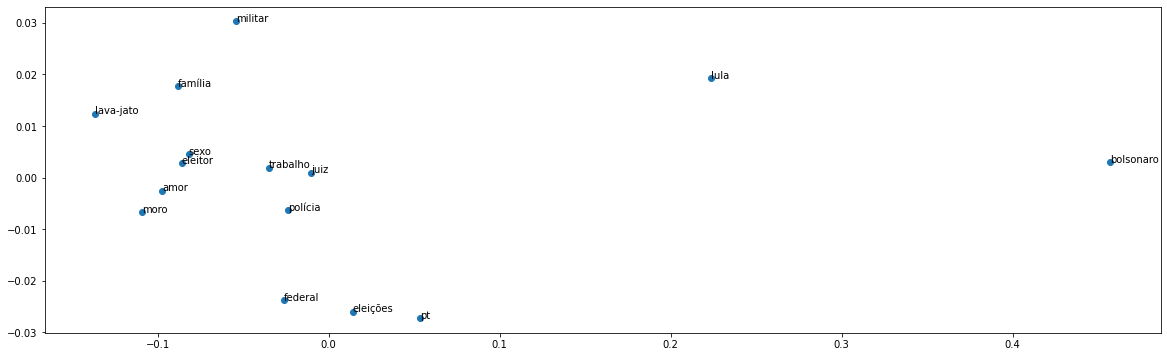

In [ ]:
from sklearn.decomposition import PCA

# fit a 2d PCA model to the vectors
X = model_SGRAM[['eleitor','bolsonaro','família','trabalho','amor','sexo','militar','eleições','pt','lula','polícia','federal','moro','juiz','lava-jato']]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = ['eleitor','bolsonaro','família','trabalho','amor','sexo','militar','eleições','pt','lula','polícia','federal','moro','juiz','lava-jato']

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(15, 2)


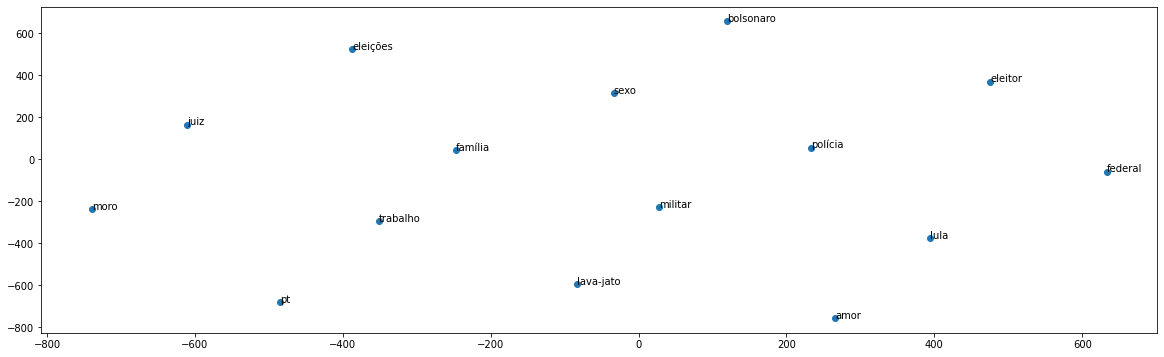

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
X = model_SGRAM[['eleitor','bolsonaro','família','trabalho','amor','sexo','militar','eleições','pt','lula','polícia','federal','moro','juiz','lava-jato']]
result = TSNE(n_components=2).fit_transform(X)
print(X_embedded.shape)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = ['eleitor','bolsonaro','família','trabalho','amor','sexo','militar','eleições','pt','lula','polícia','federal','moro','juiz','lava-jato']

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [ ]:
vocab_list = [a for a in model_SGRAM.wv.vocab.keys()]
s = np.random.random_integers(0,len(X),1000)
word_s = []
for i in s:
  if vocab_list[i].find('//') == -1: 
    word_s.append(vocab_list[i] )

# word_s   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 362 + 1) instead
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(15, 2)


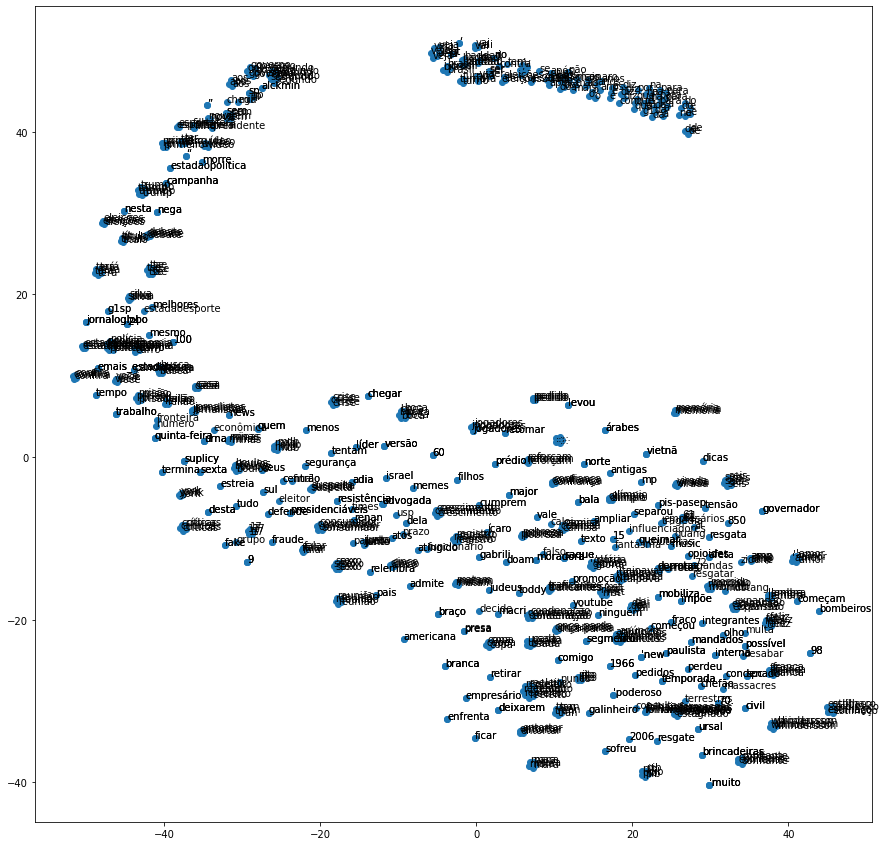

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
X = model_SGRAM[word_s]
result = TSNE(n_components=2).fit_transform(X)
print(X_embedded.shape)

f = plt.figure(figsize=(15,15))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])


for i, word in enumerate(word_s):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()